#### Firstly we need to import the libraries required to go further..

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Let’s load the data in a data frame and check how data looks like..

In [4]:
data = pd.read_csv("Titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


* This is how our Data looks like.

####  Fetch some info about data by .info()

In [5]:
print("Shape of data is :",data.shape)
print("*"*100)
data.info()

Shape of data is : (891, 12)
****************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


##### Observations:

1. Shape of data is (891,12) means in our data set we have 891 rows and 12 columns. Each row has info about a passenger so totally we have data of 891 passengers.
2. In above output , column consist the name of the column , Non-null Count means How many non-null values we have in that column , Dtype means What type of value that column consits ( int64 means int value , float64 means float value, object means string value)
3. In age column we can see, Out of 891 values we have 714 non null values. It implies that we have 177 Null values. ( 891–714 = 177)
4. Same in the Cabin feature Out of 891 values we have only 204 non-null values. it implies that we have 687 Null values. But this is Huge . we have only 23% of values present in data set and 77% values are missing so we can drop this feature while making our model.
5. Except age and cabin any features does not have any null values.

#### Fetch some info about numerical features by .describe()

In [64]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Observations:

1. Here some features are not necessary like passengerId. so we will ignore that. Only features which can be consider as numerical and need to analysis as numerical features are Age & Fare.

2. In Age feature we can see count is as 714 it means for 714 persons we have age value, else are missing. We have seen this above right.??. We have Mean as 29.69 , It means The mean age of all the passengers is 29.69 Years. Std (stander deviation ) as 14.52 It means most of the people have age in the range (29.69-14.52) to (29.69+14.52) because in a continuous Random Variable most of the values can be found in the range of (mean-std) to (mean+std). The min age as 0.42 in above image so It means out of all passengers we have 0.4 years old as the minimum age of any passenger. And We have 25% value(25th Percentile value) as 20.12 years It means 25% of passengers have Age less than 20.12 years. same we have 50%value (50th percentile value) as 28.00 It Means 50% of the passengers have age less than 28.00 years. same as 75% value (75th percentile value) we have as 38.00 It means 75% people has Age less than 38.00 years. Max value we can see as 80.00 years It Means out of all passengers the Highest aged person has age 80.00 Years.

3. Same like Age feature Analysis , you can analyze Fare feature.

#### Get info about balanced or imbalanced data set.

In [6]:
data["Survived"] = data["Survived"].map({1:"yes" , 0 :"no"})
data["Survived"].value_counts()

no     549
yes    342
Name: Survived, dtype: int64

##### Observations-

* We can see out of 891 passengers , 549 can not survived in that disaster And 342 Survived. So the data we have can not be said as imbalanced. neither it is perfectly balanced . it is like ok ok situation.

##  Bi-variate Analysis-

* Pair plots are the most widely used plots to perform visualization bi-variate analysis. But the problem with pair plot is if we have n features in dataset then it returns n*n plots. in current data set we have 12 features now so it will return 12*12= 144 plots which is again not easy to analyze. so we will take only a subset of features and analyze them.

In [8]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(data[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

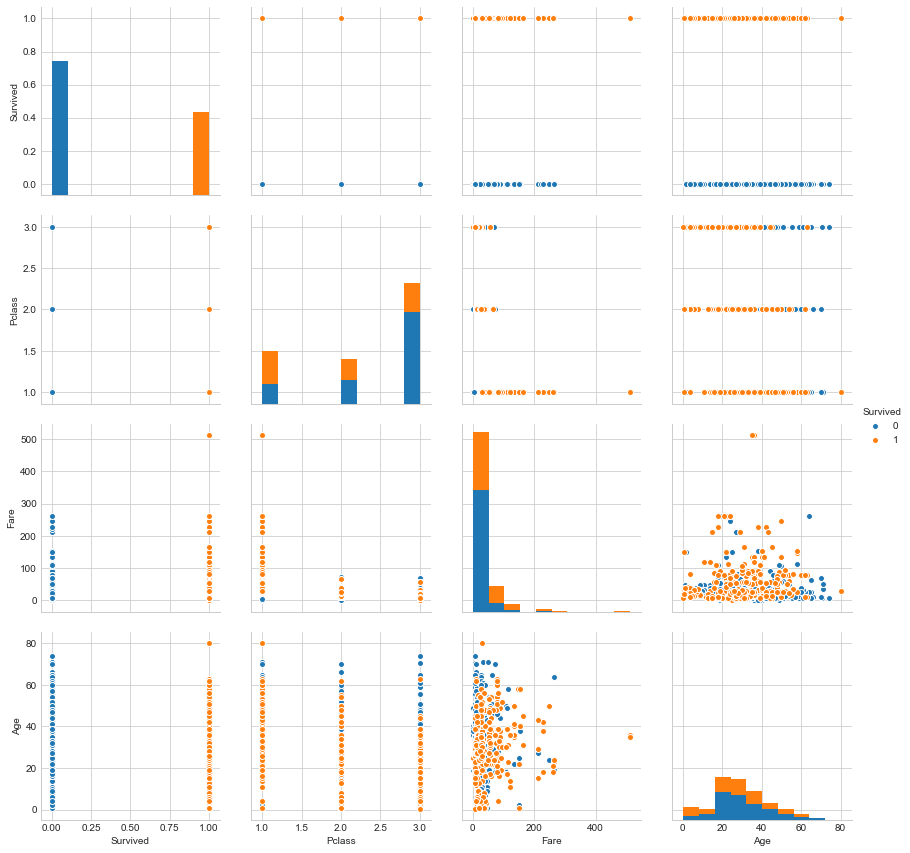

##### Observations-

* From the above grid of plots we can see that, passengers who paid higher fare or travelling in upper class has a higher chances to survive.
* Age is also giving some info like young persons have a higher chance to survive than old peoples.
* The picture is not very clear with pair plots so lets go towards uni-variate analysis to understand what exactly is happening.

## Uni-variate Analysis

#### 1.Survived Feature

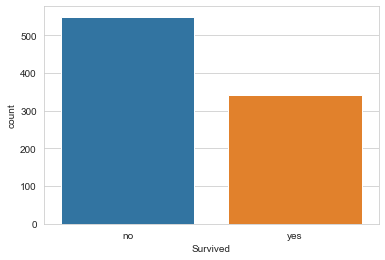

In [10]:
# Countplot counts the each category of value and plot that.
sns.countplot(data["Survived"],data = data)

##### Observations:

* As we can see ‘no’ has the value > 500 means these people can’t survived in the disaster & approx 350 people survived. It is telling same story like we have seen above.

#### 2. Pclass- Feature

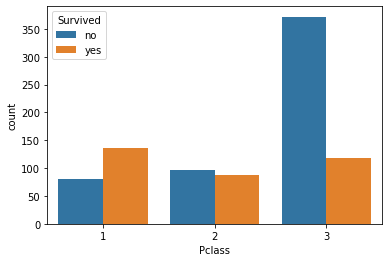

In [38]:
sns.countplot(data["Pclass"],hue = data["Survived"],data = data)

##### Observations-

* i have heard or read some where there is not any value of poor people lives😥. Same concept is applying here. In above output plot we can see Persons who were travelling in 3rd class , mostly of them died or can not survived than other class passengers.
* Persons who were travelling in 2nd class, out of them almost equal number of people died and survived.
* Persons who were travelling in 1st class, out of them large number of people survived and also fair number of persons died.
* So as the conclusion we can say that person who were travelling in lower class like 3rd has higher chances to died. & persons who were travelling in higher class like 1st has higher chance to survive.

#### 3.Sex- Feature

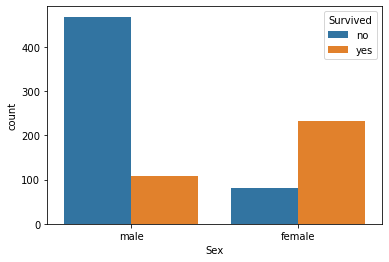

In [42]:
sns.countplot(data["Sex"],hue = data["Survived"],data = data)

##### Observstions-

* As we can see in above plot Out of all male passengers mostly of them died. And out of all Female passengers most of them survived.
* So as the conclusion we can say male passenger has higher chances to die and female passengers has higher chance to survive.Or Because of Ladies First policy , priorities were given to female passengers so the chances of survival for female passengers is increased than male passengers.

#### 4.Age-Feature- 

* Age feature consist some null values so first we need to handle that. Here i am filling the null values with median of Age Feature. we know that the median of Age feature is 28.
* Age is a numerical feature so we can’t plot a count plot for Age feature. we need to plot pdf for Age Feature.

C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


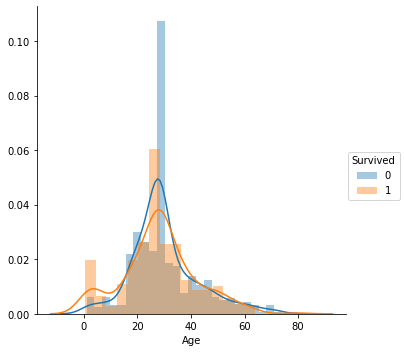

In [11]:
# Filling null Values
data = data.fillna(28)

# plotting Pdfs
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Age") \
   .add_legend()
plt.show()

##### Observations-

* Pdfs are almost overlapping on each other. so we can not conclude anything big clearly. but some of the conclusions are listed bellow.
* Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died. Means while Rescuing priorities were given to child's or teenagers.
* Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.
* Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died. it could be because of various reasons like people leave them on their luck or they died because of cold water of Atlantic Ocean of that time.. etc..

#### 5. Sibsp Feature

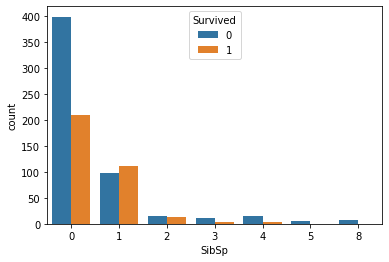

In [12]:
sns.countplot(data["SibSp"],hue = data["Survived"],data = data)

##### Observations-


* Passengers who have 0 siblings mostly of them died.
* Passengers with 1 sibling has equally chance for both die and survive.
* Wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive. But it should be high right.. because if I were on the titanic and have 4 , 5 or 8 siblings on titanic then chances of my survival should be high right. But sadly in hard times people thinks only for themselves not for others.

#### 6.Parch Feature

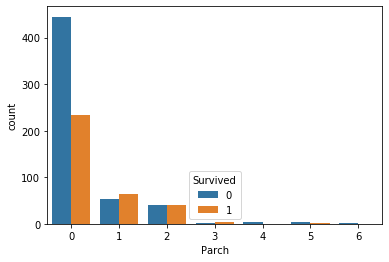

In [13]:
sns.countplot(data["Parch"],hue = data["Survived"],data = data)

##### Observations-

* Like sibsp almost Same theory is applying here. Analyze it by yourself.

#### 7. Fare feature 

C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)
C:\Users\AC\Anaconda3\lib\site-packages\seaborn\distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


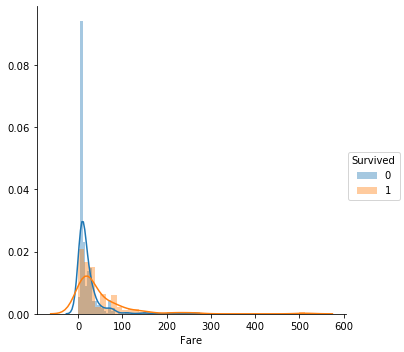

In [16]:
sns.FacetGrid(data, hue="Survived", size=5) \
   .map(sns.distplot, "Fare") \
   .add_legend();
plt.show();

##### Observations-

* Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.This observation is same like pclass persons who were rich has higher chance to survive and poor lower chance to survive.

####  8. Embarked Feature

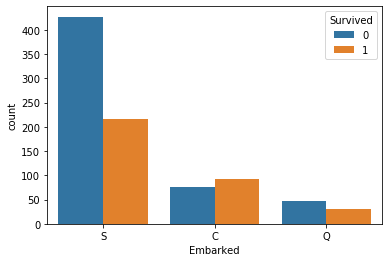

In [24]:
sns.countplot(data["Embarked"],hue = data["Survived"],data = data)

##### Observations-

* Passengers who started his journey from Southampton , most of them died.
* There is not any much difference in peoples surviving or die chances who started his journey from Cherbourg , Queenstown .

##  Some Important things here to know.

* The Data set we have consists 12 features But we are doing uni-variate analysis only on 8 features because rest 4 features are useless os not give much information to us. for e.g feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset. And in the cabin data set we have 77% null values so it is not trivial to handle cabin feature that’s why i am drooping these 4 features from my data set.

In [12]:
# You can drop those 4 features from data set with this code.
data = data.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


* Now the question comes in mind is that do we need to perform uni-variate analysis on every individual feature of the data set. how can it possible to perform uni-variate analysis on all features individually if we have a large dimensional data set. Well i think ans is no , we don’t need to perform uni-variate analysis on individual feature in a large dimensional data set. That will be too costly and time taking. in that case you can perform bi-variate analysis or take a set of columns and train a model only on that set of features and see if that is giving good result then definitely those features are useful to predict class label else not.. like these you can try many hacks to analyze.

###### So That’s all folks.. Based on the above analysis we come up with some nice facts about the Titanic disaster. As mentioned in the title this blog is mostly for Beginners so i tried to use simple lines of code so a beginner can understand easily. if you know even basic machine learning techniques like Knn , logistic-regression etc… so with these techniques and the above analysis you can build your simple machine learning model which can predict either a passenger survived or not based on the information about passenger given.

###### It’s really good to know that we are using Machine learning or AI to analyze and learn from these deadly disasters and coming up with good solutions or facts to help in ensuring that these types of accidents will not happen in the future again and if it happens then how can we minimize the loss of peoples lives and any type of loss.

###### it’s my first blog And this date (23 may) when i am publishing this is very important for me. In this blog i tried to help those people who just started to learn Ml or AI and know some very basics. I choose to write on this topic for beginners because when i was a completely beginner in Ml , AI. I Faced some difficulties in EDA part so just helping others who are facing same difficulties. 

### So okk guyzz .. WELCOME in the Community of Ai.. Lets learn and try to give a small contribution to make world better. 😊 

# THANK YOU !